# Búsqueda de atributos

Esta notebook es para generar nuevos atributos para el dataframe


In [3]:
%pylab inline
# Esto agrega al python path el directorio ..
import sys
sys.path.append("..")
import re
import numpy as np
import config
import dateutil
from transformers import transformer
from data_builder import load_test_data, load_dev_data, load_small_dev_data


df, target = load_small_dev_data()

Populating the interactive namespace from numpy and matplotlib


# From y to

Veamos la pinta de los remitentes y recipientes

Primero, agarro algo de spam y ham.

Acá seteo muchos atributos que están metidos en `transformers`

In [4]:
receivers = df.parsed_emails.apply(lambda p: p.get_all("To") or p.get_all("to") or [])
senders = df.parsed_emails.apply(lambda p: p.get_all("From") or p.get_all("from") or [])

def join_mails(t):
    return ";".join(t)

def is_ascii(s):
    try:
        s.encode('ascii')
        return True
    except UnicodeDecodeError:
        return False
    
def parse_date(parsed_mail):
    try:
        date = parsed_mail.get('Date') or parsed_mail.get('date')
        return dateutil.parser.parse(date, fuzzy_with_tokens=True)[0]
    except (ValueError, AttributeError):
        return None


df['from_text'] = senders.apply(join_mails)
df['to_text'] = receivers.apply(join_mails)
df['number_of_receivers'] = df['to_text'].apply(lambda t: len(re.findall(r'<.*>', t)))
df['from_non_ascii'] = df.from_text.apply(lambda f: not is_ascii(f))

In [5]:
import random
dates = df.parsed_emails.apply(parse_date)

df['hour'] = dates.apply(lambda t: t.hour if t else random.choice(range(24)))
df['hour_between_7_and_20'] = df['hour'].apply(lambda h: h >= 7 and h <= 21)


df['day_of_month'] = dates.apply(
    lambda d: d.day if d else random.choice(range(29))
)

df['weekday'] = dates.apply(
    lambda d: d.weekday() if d else random.choice(range(6))
)

df['is_weekend'] = df.weekday >= 5

df['year'] = dates.apply(
    lambda d: d.year if d else random.choice(range(1990, 2005))
)


In [6]:
spam = df[target].sample(30)
ham = df[target == False].sample(30)



In [7]:
print "Enviadores de spam"
print "="* 100
print "\n".join(spam.from_text)
print "\n\nEnviadores de ham"
print "="* 100
print "\n".join(ham.from_text)


Enviadores de spam
kryak@rknxnjf.imail.ru
"KT event" <Xroshot@ktpda.w3ip.co.kr>
leila harrison <daskewnlwapgsu#####>
engeorgeogbedi <engeorgeogbedi@zwallet.com>
"doug newman" <vyzjg#####>
"emerging growth alert" <obdp#####>
"luke harmon" <jeriseward#####-laajakaista.fi>
"dianne " <clpxiyauclatq#####>
"Eliseo Blake" <FLQCYCWCIBJBI@eudoramail.com>
"citizens bank" <support#####>
"playstation2" <7iutgnd#####>
"ila " <gmeldhxhieeov#####>
"jobslog.com" <jobslog#####>
Alex Madeline  <alex_chep@spark.krasnoyarsk.su>
"tami white" <wahgkrzgaa#####>
vanessa j. smith <55anna#####>
"danial kistler" <pialoma@inonesearch.com>
"Dallas Weir" <rnrlrxqy@visitweb.com>
"Maddison Hallam" <kailyndigby@gaoland.net>
"½Å¼Ó´ëÃâ100%" <yhtnquipv@nudegirl.w3ip.co.kr>
"drh" <kuhkjhkh@ns1.freebit.net>
"Julianne Burr" <uukwpjbvtiys@ehdi.net>
"Torsten Pritchett" <Torsten3764@jbugs.com>
"NETPATAGONIA" <cellgprs@iespana.es>
"business skills seminar" <mbaseminar#####>
"Reilly Aidan" <Krasimirov@wlf.de>
"Moises Fitzgerald"

In [8]:
print "Receptores de spam"
print "="* 100
print "\n".join(spam.to_text)
print "\nReceptores de ham"
print "="* 100
print "\n".join(ham.to_text)


Receptores de spam
dennis@ectisp.net
<Bill.Williams.III@ENRON.com>
##########

"derm" <derm#####>
##########
"clive garrett" <paliourg#####>
"paliourg" <paliourg#####>
<csemper@ect.enron.com>
"paliourg" <paliourg#####>
<jkoutsi#####>
"sigletos" <sigletos#####>
##########
larry_campbell@enron.com
<abazis#####>
##########
"Jorge Norskog" <Shelley.Corman@ENRON.com>
kkeiser@ect.enron.com, shelley.corman@ENRON.COM, Theresa.Staab@enron.com
tori.kuykendall@enron.com
Susan.Bailey@enron.com
mwhitt@enron.com
<greg.whalley@enron.com>
"Amilia Glover" <Mike.Swerzbin@enron.com>
<Andy.Zipper@ENRON.com>
##########
"Morawska Agnieszka" <Michael.e.taylor@enron.com>
"Mark.whitt" <Mark.whitt@enron.com>
vpimenov <vpimenov@enron.com>
LISA.GANG@enron.com
PLucci@enron.com

Receptores de ham
"Anderson, Gary E." <Gary.Anderson@ENRON.com>,
	"Anderson, Ken" <Ken.Anderson@ENRON.com>,
	"Beck, Judy" <Judy.Beck@ENRON.com>,
	"DL-ETS Gas Controllers" <DL-ETSGasControllers@ENRON.com>,
	"Frazier, Perry" <Perry.Frazier@EN

In [9]:
import re

first_ham = ham.iloc[0]

re.findall(r'<.*>', first_ham.to_text)

print df.number_of_receivers.unique()

[  4   0   1   2   5   3   7  10   6  28   9  13  18   8  38  14  11  16
  15  27  82  39  12  24  56  63  17  34  25  42  52  20  22  41  32  86
  40  43  33  69  23  76  77 124  47 125  29  26 135  85  19 101  71 110
  83  48 138  68  74  21  37  36  31  53  50 107  72  49  84  35  96  30
  92 112  66  44  75  57  46  64  73  54 148 126 123  99 114  79 150 111
  91  80 102]


In [10]:

print "NON ASCII totales: {}".format(np.count_nonzero(df.from_non_ascii))

target

print "NON ASCII (spam): {}".format(np.count_nonzero(df.from_non_ascii & target))
print "NON ASCII (ham): {}".format( np.count_nonzero(df.from_non_ascii & np.logical_not(target)))



NON ASCII totales: 240
NON ASCII (spam): 240
NON ASCII (ham): 0


# Distribución horaria y por día


(array([ 305.,  287.,  675.,  888.,  739.,  710.,  314.,  132.]),
 array([  0.   ,   2.875,   5.75 ,   8.625,  11.5  ,  14.375,  17.25 ,
         20.125,  23.   ]),
 <a list of 8 Patch objects>)

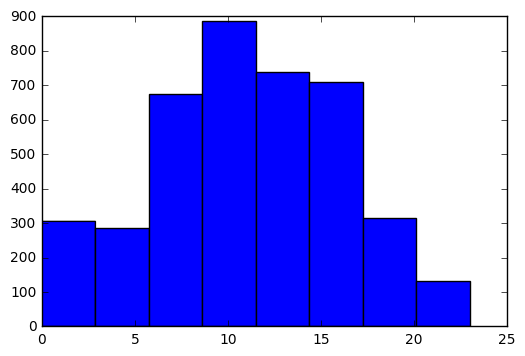

In [11]:
ham = df[np.logical_not(target)]
spam = df[target]

hist(ham.hour, range=[0, 23], bins=8)

(array([ 525.,  503.,  525.,  508.,  506.,  481.,  521.,  480.]),
 array([  0.   ,   2.875,   5.75 ,   8.625,  11.5  ,  14.375,  17.25 ,
         20.125,  23.   ]),
 <a list of 8 Patch objects>)

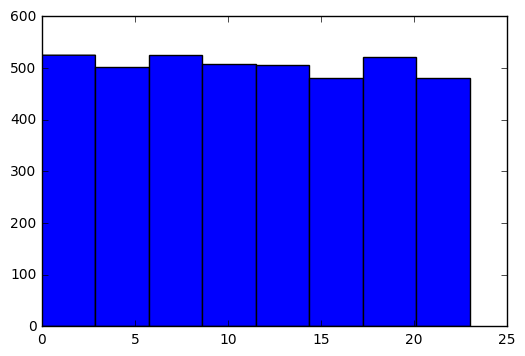

In [12]:

hist(spam.hour, range=[0, 23], bins=8)

Podemos observar en los dos histogramas anteriores que mientras el spam se distribuye 

# Día del mes

(array([ 711.,  773.,  682.,  702.,  753.,  829.,  996.,  832.,  869.,  952.]),
 array([  0. ,   3.1,   6.2,   9.3,  12.4,  15.5,  18.6,  21.7,  24.8,
         27.9,  31. ]),
 <a list of 10 Patch objects>)

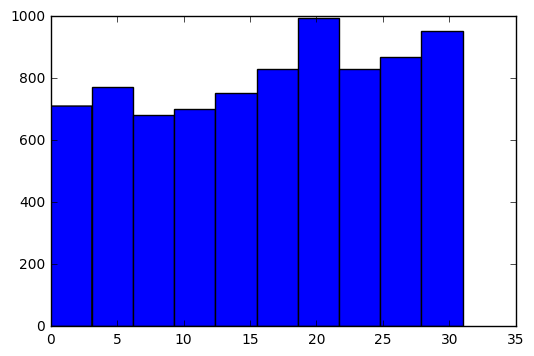

In [13]:
hist(df.day_of_month)

(array([ 373.,  412.,  332.,  382.,  388.,  399.,  489.,  451.,  364.,  459.]),
 array([  0. ,   3.1,   6.2,   9.3,  12.4,  15.5,  18.6,  21.7,  24.8,
         27.9,  31. ]),
 <a list of 10 Patch objects>)

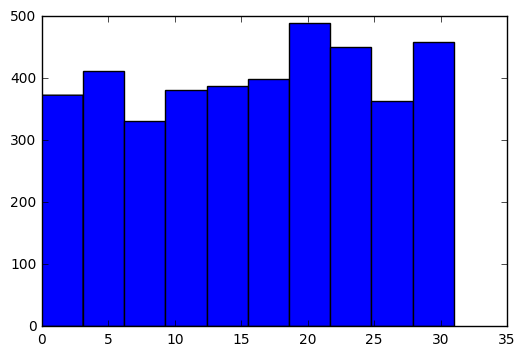

In [14]:
hist(spam.day_of_month)

(array([ 338.,  361.,  350.,  320.,  365.,  430.,  507.,  381.,  505.,  493.]),
 array([  1.,   4.,   7.,  10.,  13.,  16.,  19.,  22.,  25.,  28.,  31.]),
 <a list of 10 Patch objects>)

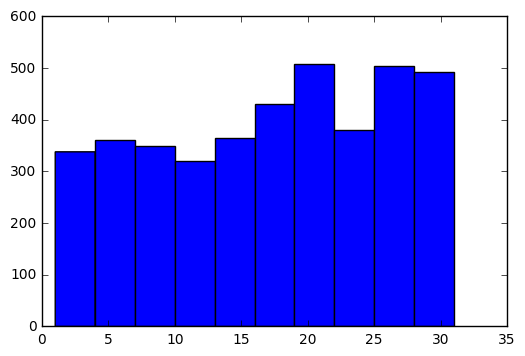

In [15]:
hist(ham.day_of_month)

# Día de la semana

Veamos la distribución de spam en los días de la semana


(array([ 546.,  656.,  625.,  636.,  599.,  502.,  485.]),
 array([ 0.        ,  0.85714286,  1.71428571,  2.57142857,  3.42857143,
         4.28571429,  5.14285714,  6.        ]),
 <a list of 7 Patch objects>)

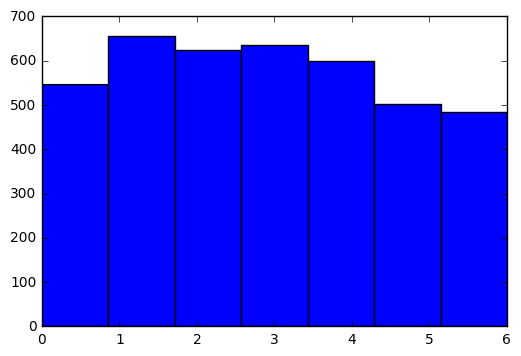

In [16]:

hist(spam['weekday'], bins=7)

(array([ 809.,  774.,  763.,  817.,  683.,   94.,  110.]),
 array([ 0.        ,  0.85714286,  1.71428571,  2.57142857,  3.42857143,
         4.28571429,  5.14285714,  6.        ]),
 <a list of 7 Patch objects>)

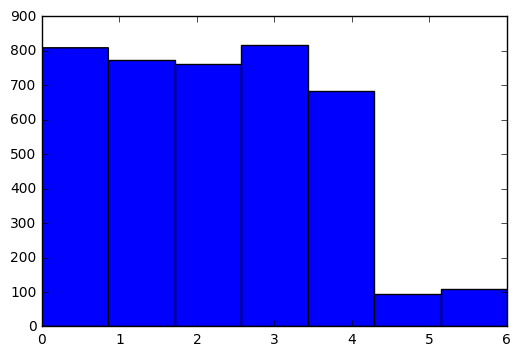

In [17]:
hist(ham['weekday'], bins=7)

# Año

(array([  6.00000000e+00,   1.20000000e+01,   7.00000000e+00,
          9.00000000e+00,   4.00000000e+00,   1.00000000e+01,
          1.00000000e+01,   1.20000000e+01,   1.10000000e+01,
          1.90000000e+01,   6.41000000e+02,   3.64400000e+03,
          1.95400000e+03,   4.60000000e+01,   6.81000000e+02,
          1.00400000e+03,   2.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00]),
 array([ 1990.,  1991.,  1992.,  1993.,  1994.,  1995.,  1996.,  1997.,
         1998.,  1999.,  2000.,  2001.,  2002.,  2003.,  2004.,  2005.,
         2006.,  2007.,  2008.,  2009.,  2010.]),
 <a list of 20 Patch objects>)

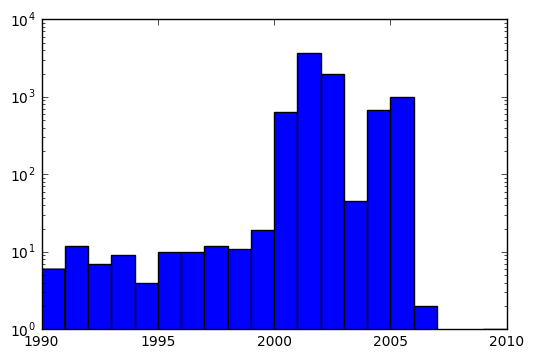

In [18]:
hist(df.year, range=[1990, 2010], bins=20, log=True)

(array([  1.10000000e+01,   1.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   7.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   4.80000000e+01,   2.24100000e+03,
          1.73300000e+03,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   5.00000000e+00]),
 array([ 1898.,  1905.,  1912.,  1919.,  1926.,  1933.,  1940.,  1947.,
         1954.,  1961.,  1968.,  1975.,  1982.,  1989.,  1996.,  2003.,
         2010.,  2017.,  2024.,  2031.,  2038.]),
 <a list of 20 Patch objects>)

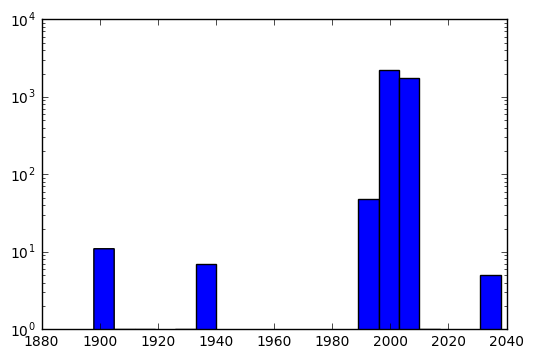

In [19]:
hist(spam.year, bins=20, log=True)

(array([   10.,     0.,     0.,   626.,     0.,     0.,  2577.,     0.,
            0.,   837.]),
 array([ 1999. ,  1999.3,  1999.6,  1999.9,  2000.2,  2000.5,  2000.8,
         2001.1,  2001.4,  2001.7,  2002. ]),
 <a list of 10 Patch objects>)

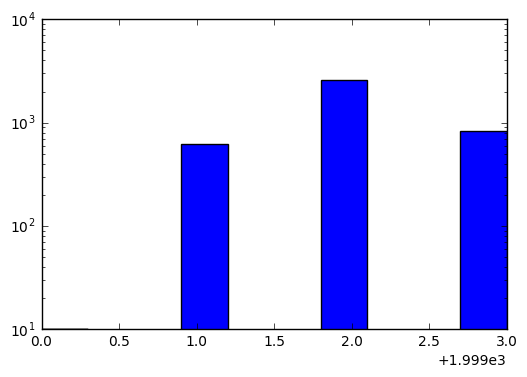

In [20]:
hist(ham.year, log=True)

In [21]:
ham.year.unique()

array([2000, 2001, 2002, 1999])